Implement hierarchical clustering. 

Start the bottom of the hierarchy with all point (or at least 5000 sampled) and build the hierarchy by repeatedly "joining the closest" clusters with avg_dist or single_dist criteria up to one big cluster (full hierarchy). 

Then decide how to cut it for K=2 or K=5 or K=10 clusters and evaluate. Run on moons dataset.

Look into Kruskals algorithm to get an MST!!

otherwise, priority queue

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('moons.csv')

# truncate to 10 rows to begin
df = df[:500]

In [34]:
df.iloc[0]

Xmoons_X1   -0.378142
Xmoons_X2    0.940750
Name: 0, dtype: float64

In [35]:
# distance:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

#
def kruskals_algorithm(data, k):
    # Initialize the MST
    mst = []

    # Initialize the clusters (each point is its own cluster)
    clusters = []
    for i in range(len(data)):
        clusters.append([i])
    
    # Initialize the edges
    edges = []
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            edges.append((i, j, euclidean_distance(data.iloc[i], data.iloc[j])))
    edges = sorted(edges, key=lambda x: x[2])

    # Kruskal's algorithm
    while len(mst) < len(data) - k:
        edge = edges.pop(0)
        c1 = -1
        c2 = -1
        for i in range(len(clusters)):
            if edge[0] in clusters[i]:
                c1 = i
            if edge[1] in clusters[i]:
                c2 = i
        if c1 != c2:
            mst.append(edge)
            clusters[c1] = clusters[c1] + clusters[c2]
            clusters.pop(c2)
    
    # after popping, recalculate distances

    return mst


In [36]:
# sample distance between two points:
# print(euclidean_distance(df.iloc[0], df.iloc[1]))
clusters = [0,1,2]

# 3 points:
    #df.iloc[0]
    #df.iloc[1]
    #df.iloc[2]
# 3 clusters:
    #clusters[0]
    #clusters[1]
    #clusters[2]

# get min distance between all points in clusters
min_i = 0
min_dist = 1000000
for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        dist = euclidean_distance(df.iloc[clusters[i]], df.iloc[clusters[j]])
        print(dist)
        if dist < min_dist:
            min_dist = dist
    min_i = i

print(min_dist)

# merge clusters:
clusters.pop(min_i)
print(clusters)
# get min distance between all points in clusters
min_dist = 1000000
for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        dist = euclidean_distance(df.iloc[clusters[i]], df.iloc[clusters[j]])
        print(dist)
        if dist < min_dist:
            min_dist = dist
print(min_dist)



1.5296604904704645
2.4664835023782596
1.166721766328796
1.166721766328796
[0, 1]
1.5296604904704645
1.5296604904704645


[(87, 305, np.float64(0.0016671927027946773)), (172, 272, np.float64(0.0017719639510493772)), (91, 234, np.float64(0.0036525911018134476)), (218, 265, np.float64(0.004390610154581671)), (22, 370, np.float64(0.004628512784905497)), (327, 384, np.float64(0.004729806178083109)), (427, 433, np.float64(0.004758417848213869)), (59, 394, np.float64(0.0050053984831103905)), (56, 222, np.float64(0.005112619803771277)), (181, 480, np.float64(0.005309551542334042)), (253, 283, np.float64(0.005437377076597646)), (204, 274, np.float64(0.006525270252811365)), (216, 479, np.float64(0.006587401230411935)), (35, 279, np.float64(0.006785295988209637)), (69, 437, np.float64(0.007561246259841321)), (173, 256, np.float64(0.007586128441738842)), (171, 430, np.float64(0.007646467735492966)), (125, 267, np.float64(0.00785652817561706)), (107, 431, np.float64(0.00787714410049054)), (73, 138, np.float64(0.008087325805118282)), (218, 378, np.float64(0.008261606994658183)), (48, 142, np.float64(0.0083067878179101

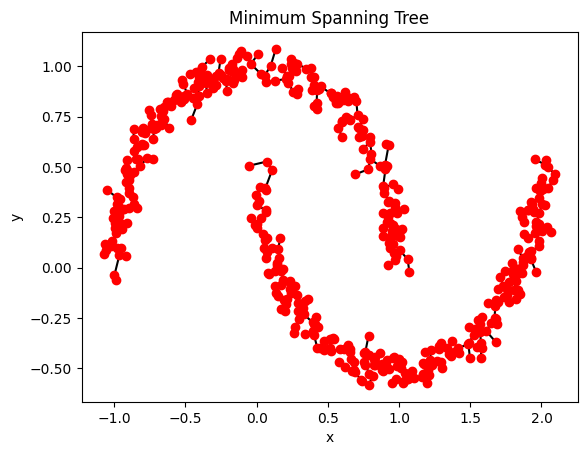

In [37]:
hierarchial_clustering = kruskals_algorithm(df, 2)
print(hierarchial_clustering)

# Visualize edges of the MST

for edge in hierarchial_clustering:
    x1, y1 = df.iloc[edge[0]]
    x2, y2 = df.iloc[edge[1]]
    plt.plot([x1, x2], [y1, y2], 'k-')
plt.title('Minimum Spanning Tree')
plt.xlabel('x')
plt.ylabel('y')


# Visualize clusters
for i in range(len(df)):
    x, y = df.iloc[i]
    plt.plot(x, y, 'ro')

plt.show()

C:\Users\koola\AppData\Local\Temp\ipykernel_15704\814285892.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(distance_matrix, method='ward')


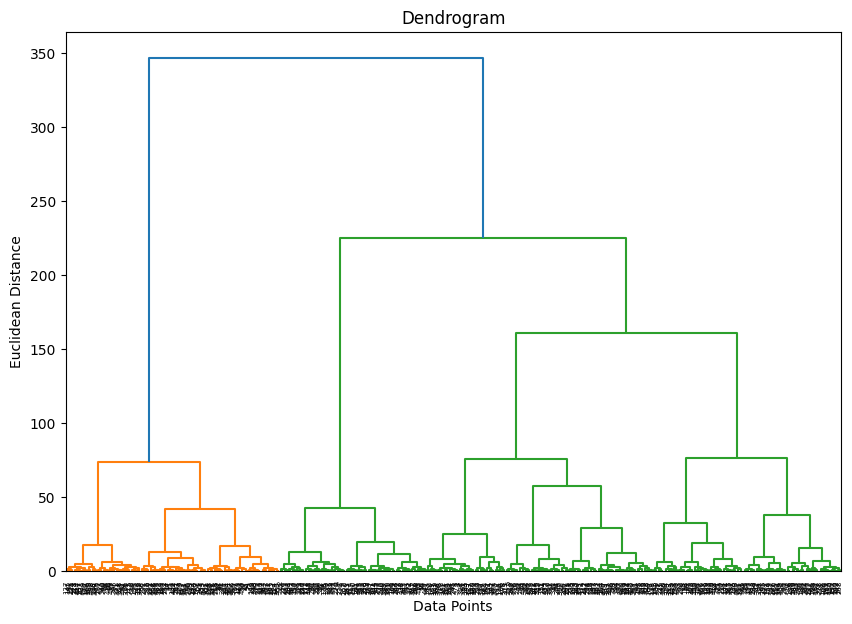

In [38]:
# create a dendogram
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
# Compute the distance matrix
distance_matrix = squareform(pdist(df, metric='euclidean'))
# Perform hierarchical clustering
Z = sch.linkage(distance_matrix, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
